In [1]:
import os
os.chdir("/home/user/src")

In [2]:
from dataloader_sen12msDFC import Dataset_Sen12msDFC

In [3]:
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt

# make sure S2 is preprocessed correctly and show label distribution

================ train ================


  0%|          | 0/4000 [00:00<?, ?it/s]

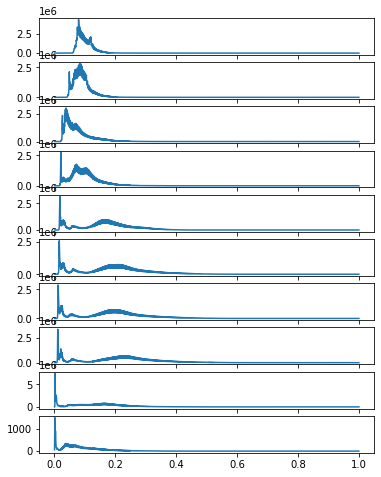

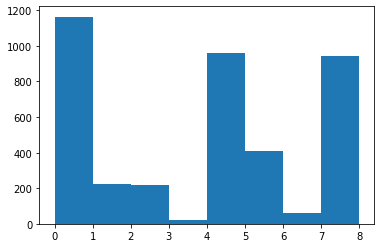

================ val ================


  0%|          | 0/1128 [00:00<?, ?it/s]

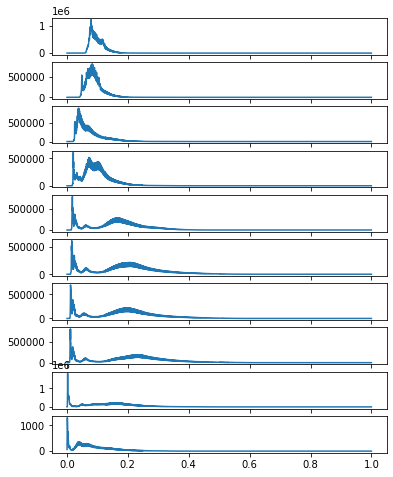

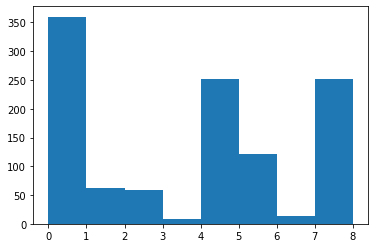

================ test ================


  0%|          | 0/986 [00:00<?, ?it/s]

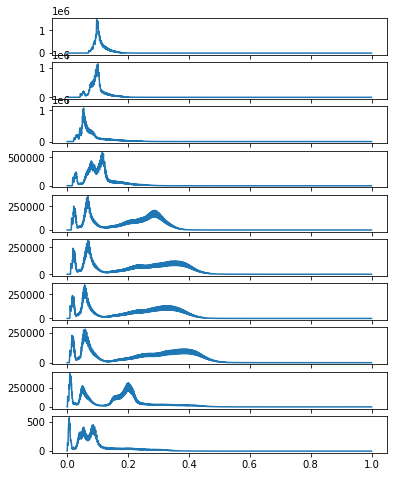

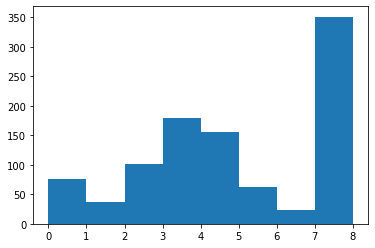

In [4]:
for key in ["train","val","test"]:

    print("================",key,"================")

    ds = Dataset_Sen12msDFC("/home/user/data/sen12msDFC",
                            key)

    H = np.zeros((10,2000))
    bins = np.linspace(0,1,2001)
    labels = []

    for ijk in tqdm(range(len(ds))):
        img = ds[ijk][0]
        labels.append(ds[ijk][1].item())
        for channelidx in range(10):
            H[channelidx] += np.histogram(img[channelidx].flatten(),bins=bins)[0]
        #break

    H[channelidx] /= len(ds)
    
    f,loax = plt.subplots(10,1,figsize=(6,8))
    for channelidx in range(10):
        loax[channelidx].plot(bins[1:],H[channelidx])
    plt.show()

    plt.hist(labels,bins=np.arange(9))
    plt.show()

# show exampels

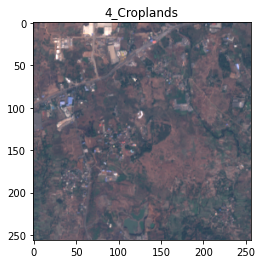

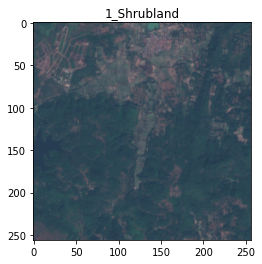

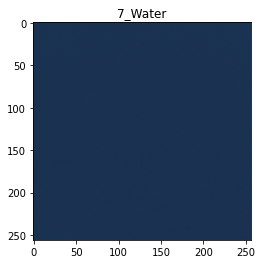

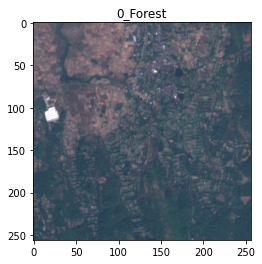

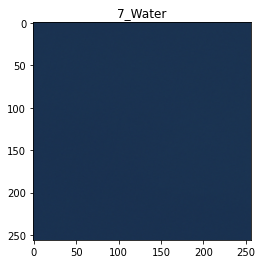

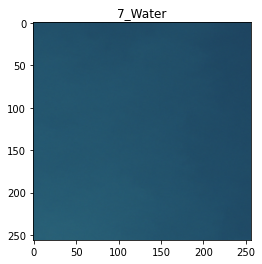

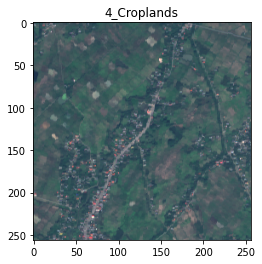

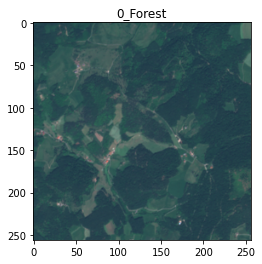

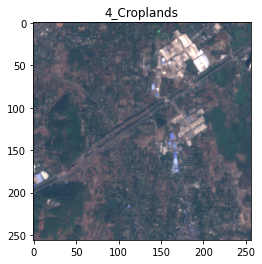

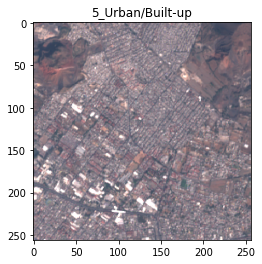

In [5]:
def s2toRGB(x):
    B,G,R = x[:3]
    X = np.stack([R,G,B],axis=-1)
    X = np.clip(X*4,0,1)
    return X

classes = ['Forest',
 'Shrubland',
 'Grassland',
 'Wetlands',
 'Croplands',
 'Urban/Built-up',
 'Barren',
 'Water']

ds = Dataset_Sen12msDFC("/home/user/data/sen12msDFC",
                        "train")
    
for i in np.random.permutation(np.arange(4000))[:10]:

    img, label = ds[i]

    plt.imshow(s2toRGB(img))
    plt.title(str(label.item())+f"_{classes[label.item()]}")
    plt.show()